Index(['NO', 'NAMA RUMAH', 'Harga', 'Luas_Bangunan', 'Luas_Tanah',
       'Kamar_Tidur', 'Kamar_Mandi', 'Garasi'],
      dtype='object')
   NO                                         NAMA RUMAH       Harga  \
0   1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...  3800000000   
1   2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...  4600000000   
2   3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...  3000000000   
3   4           Rumah Baru Tebet, Tebet, Jakarta Selatan   430000000   
4   5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...  9000000000   

   Luas_Bangunan  Luas_Tanah  Kamar_Tidur  Kamar_Mandi  Garasi  
0            220         220            3            3       0  
1            180         137            4            3       2  
2            267         250            4            4       4  
3             40          25            2            2       0  
4            400         355            6            5       3  
📌 Korelasi antar variabel:
             

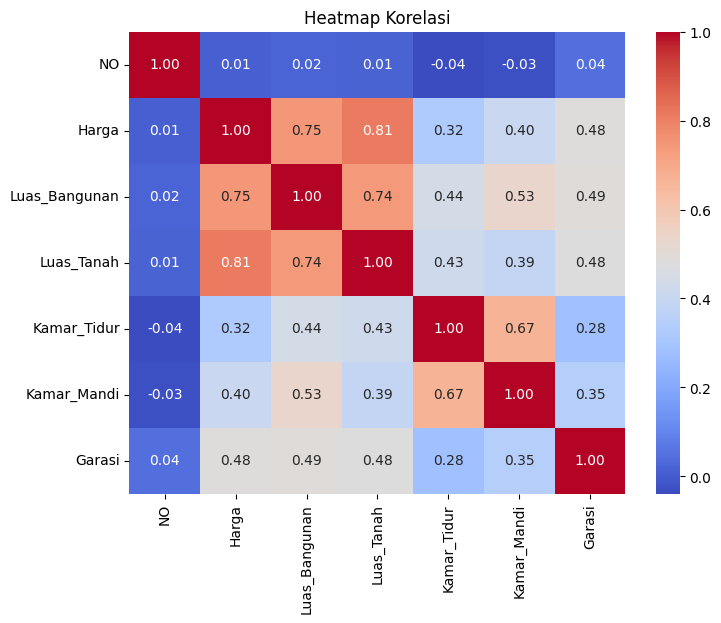

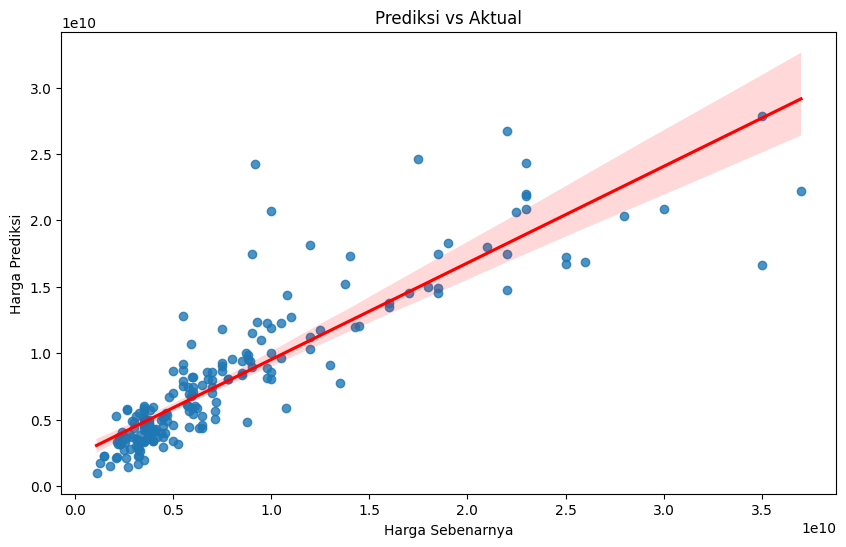

🎯 Akurasi Model (R²): 0.7713
📉 Root Mean Squared Error (RMSE): 3,267,373,421.28


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 🔹 Load atau Simulasi Dataset
df = pd.read_csv('data_bersih.csv')
print(df.columns)


print(df.head())

# 📊 UJI KORELASI
print("📌 Korelasi antar variabel:")
print(df.corr(numeric_only=True))

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
os.makedirs('static/images', exist_ok=True)
plt.savefig('static/images/heatmap_korelasi.png')
plt.show()

# 🔧 Training Model
X = df[['Kamar_Tidur', 'Kamar_Mandi', 'Garasi', 'Luas_Bangunan', 'Luas_Tanah']]
y = df['Harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Simpan model
os.makedirs("save_model", exist_ok=True)
joblib.dump(model, 'save_model/model.pkl')

# 📈 Visualisasi Prediksi vs Aktual
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Harga Sebenarnya')
plt.ylabel('Harga Prediksi')
plt.title('Prediksi vs Aktual')
plt.savefig('static/images/hasil_visualisasi.png')
plt.show()

# ✅ Evaluasi Akurasi Model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
akurasi_model = round(r2 * 100, 2)  # misal 89.34 (%)
# Simpan akurasi ke file
with open("save_model/accuracy.txt", "w") as f:
    f.write(str(akurasi_model))
    
print(f"🎯 Akurasi Model (R²): {r2:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Simpan data ke save_model/
df.to_csv("save_model/data.csv", index=False)